In [3]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
zip_path = '/content/drive/MyDrive/Data_Snakes.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

print("Dataset extracted !")

Dataset extracted !


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    '/content/Data_Snakes/train_all',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=False
)

sample_batch, labels_batch = next(train_gen)
print(f"Input batch shape: {sample_batch.shape}")

extracted_features = feature_extractor.predict(sample_batch)
print(f"Extracted features shape: {extracted_features.shape}")

flattened_features = extracted_features.reshape(extracted_features.shape[0], -1)
print(f"Flattened features shape: {flattened_features.shape}")
print(f"Dimensionality reduced from {sample_batch[0].size} to {flattened_features[0].size} per image.")

Found 6625 images belonging to 2 classes.
Input batch shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Extracted features shape: (32, 4, 4, 512)
Flattened features shape: (32, 8192)
Dimensionality reduced from 67500 to 8192 per image.


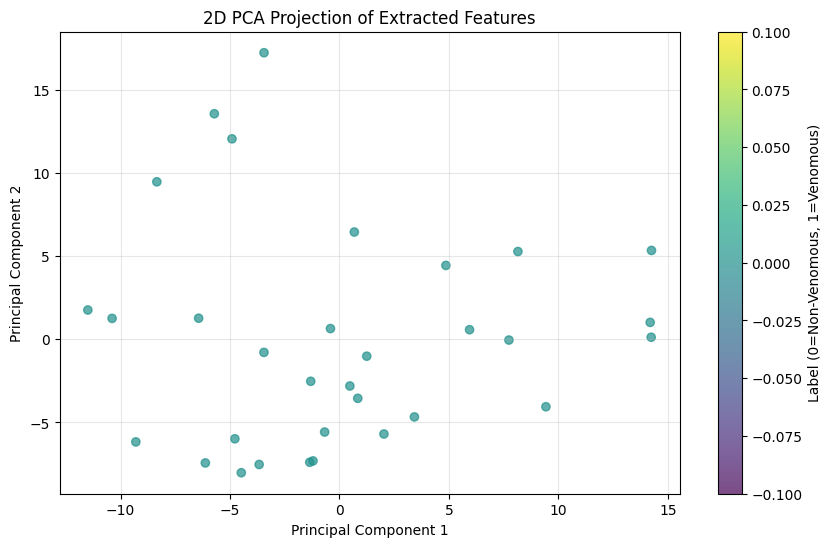

In [5]:
#visualization - Performs of PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(flattened_features)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1],
                      c=labels_batch, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Label (0=Non-Venomous, 1=Venomous)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Extracted Features')
plt.grid(True, alpha=0.3)
plt.show()